# Plotting spatial data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
xr.set_options(display_style='text')

In [2]:
import sys
sys.path.append('/home/voehring/voehring/notebooks/spatial-data')
import spatial_data

In [3]:
ds = xr.load_dataset('../../../small_image.zarr')

/home/voehring/.local/lib/python3.8/site-packages/xarray/backends/plugins.py:117: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)


## Channel overlays

The slicing capabilities of `xarray` make data visualisation very easy. The general pattern is here to first select the channels, image regions and labels of interest, and then to use the plotting functions that are available via the `.pl` accessor. In the following we show some examples.

No plot defined yet.


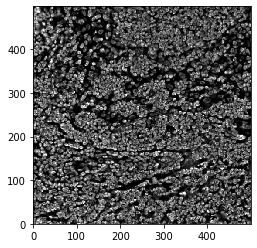

In [4]:
_ = ds.im['Hoechst'].pl.imshow()

Note that a warning message was thrown indicating that no plot was defined. We can define a plot by calling the `im.colorize` method.

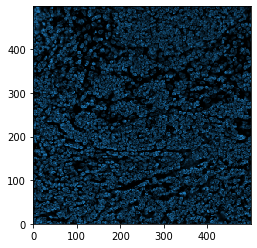

In [5]:
_ = ds.im['Hoechst'].im.colorize().pl.imshow()

The `im.colorize` function allows us to make image overlays quickly by first selecting the channels of interest. We illustrate this by first selecting the CD4 and CD8 channels and then assigning the colors `C2` (`matplotlib` color for green) and `C3` (red), respectively.

Dropped 2830 cells.


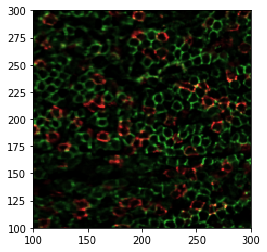

In [6]:
_ = ds.im[['CD4', 'CD8'], 100:300, 100:300].im.colorize(colors=['C2', 'C3']).pl.imshow()

All plotting functions accept `matplotlib.Axes` via the `ax` argument. This enables to easily modify plots using the normal `matplotlib` API.

Dropped 2830 cells.


Text(0, 0.5, 'X')

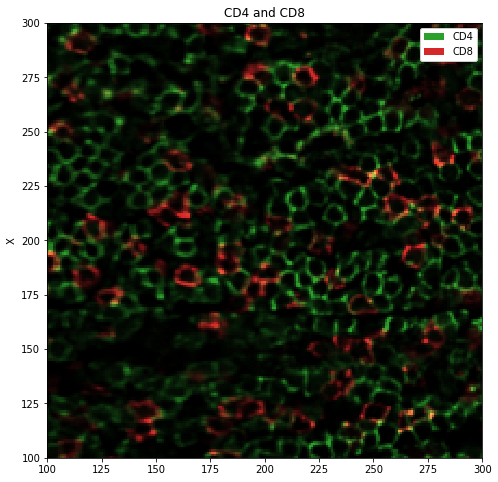

In [7]:
fig = plt.figure(figsize=(8, 8))
ax = plt.gca()

_ = ds.im[['CD4', 'CD8'], 100:300, 100:300].im.colorize(colors=['C2', 'C3']).pl.imshow(legend_background=True, ax=ax)
ax.set_title('CD4 and CD8')
ax.set_ylabel('Y')
ax.set_ylabel('X')
